# Predicting the optimal placement of a hospital in a Toronto neighbourhood

## Table of Contents    
  * [Introduction: Business Problem](#intro)
  * [Data](#data)

## Introduction: Business Problem <a id="intro"></a>

<p> 
    For this project we will be trying to determine the best possible location to open an additional medical centre/ hospital in the city of Toronto. Many a time one might hear news about how there may not be enough space at a hospital for all the patients needing help and when there comes a time like an epidemic or a pandemic (as is the current state of things in the world), this is especially the case. 

</p>
    
<p>    
    This report will be of interest to the board of directors and stakeholders of the hospital in question as well as the city of Toronto staff who would help oversee its development. 
    
</p>

<p>
    Our aim is to look for populated areas in neighbourhoods where there appears to be more young children and elderly present. Once those neighbourhoods have been found, we will then search the surrounding area for any other such health centres in the vicinity as we would like to construct the hospital in a distance far enough away from the others in an area where it would be most needed.
    
<p>

<p>
    Using this criteria and our purpose along with relevant data to provide support, we aim to share our findings and reasonings for our choices with the city of Toronto staff, hospital board of directors, and stakeholders, on where we would advise them to construct the health centre.
    
</p>

## Data <a id="data"></a>

<p> 
    As mentioned above in the business problem, the factors that will influence our decision are:
</p>
      
  * The number of hospitals/ health centres in the area
  * The number of people in the area
  * Ages of the constituents of the neighbourhood

<p> We will be using the following data sources for our analysis:</p>

  * **[Toronto neighbourhoods data](https://open.toronto.ca/dataset/neighbourhoods/)** - *Attribution: [Open Data Licence - Toronto](https://open.toronto.ca/open-data-license/); Contains information licensed under the Open Government Licence – Toronto* 

<p>This csv dataset will be used to obtain the initial neighbourhood profiles and their geographical coordinates using the area_name, longitude and latitude columns. </p>

  * **[Toronto neighbourhood profiles data](https://open.toronto.ca/dataset/neighbourhood-profiles/)** - *Attribution: [Open Data Licence - Toronto](https://open.toronto.ca/open-data-license/); Contains information licensed under the Open Government Licence – Toronto*
  
<p>This source will be used to determine the age of the constituents in their respective neighbourhoods. In our case, we will be finding and using the appropriate rows with the population age characteristics data for seniors and children. Using the csv dataset we will also locate the number code for each neighbourhood and match it to the relevant area code column of the previous dataset in order to connect the data.  </p>

  * **[Foursquare API](https://developer.foursquare.com/docs/)** 

<p>This API will be used to determine the location and number of hospitals in the Toronto area. We will then proceed to visualize this data through a map using Folium so we can see where the hospitals are situated and their distances from one another.</p>


### Import libraries

In [1]:
import pandas as pd
import numpy as np

!pip install geopy
from geopy.geocoders import Nominatim

#Matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#K-means from clustering stage
from sklearn.cluster import KMeans

#folium
!pip install folium
import folium

### Define Foursquare Credentials and Version

In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# Define instance of geocoder

address = 'Toronto, ON'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Toronto, Ontario are {}, {}.'.format(latitude, longitude))


The geographical coordinates of Toronto, Ontario are 43.6534817, -79.3839347.


In [4]:
# Get initial folium map of Toronto

toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)
toronto_map

### Get csv data files to work with 

In [5]:
# The code was removed by Watson Studio for sharing.

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [6]:
# The code was removed by Watson Studio for sharing.

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


### Rename dataframes

In [7]:
neighbourhood_df = df_data_1
neighbourhood_df.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [8]:
demographics_df = df_data_2
demographics_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%


### Get names of columns of dataframes

In [9]:
demographics_df.columns.values.tolist()

['_id',
 'Category',
 'Topic',
 'Data Source',
 'Characteristic',
 'City of Toronto',
 'Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Ce

In [10]:
neighbourhood_df.columns.values.tolist()

['_id',
 'AREA_ID',
 'AREA_ATTR_ID',
 'PARENT_AREA_ID',
 'AREA_SHORT_CODE',
 'AREA_LONG_CODE',
 'AREA_NAME',
 'AREA_DESC',
 'X',
 'Y',
 'LONGITUDE',
 'LATITUDE',
 'OBJECTID',
 'Shape__Area',
 'Shape__Length',
 'geometry']

In [11]:
#switch rows and columns in demographics_df

#demographics_df = demographics_df.T

#demographics_df.head()


### Map Toronto neighbourhoods using markers 

In [12]:
#Add markers
for lat, lng, label in zip(neighbourhood_df['LATITUDE'], neighbourhood_df['LONGITUDE'], neighbourhood_df['AREA_NAME']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False
    ).add_to(toronto_map)

toronto_map

### Isolate columns and rows we want in the appropriate dataframes

In [13]:
neighbourhood_num_df = demographics_df[demographics_df.Characteristic == 'Neighbourhood Number']

In [14]:
neighbourhood_num_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31


### Select rows featuring age statistics

In [15]:
age_stats_df = demographics_df[(demographics_df.Characteristic == 'Children (0-14 years)') | (demographics_df.Characteristic == 'Youth (15-24 years)') | (demographics_df.Characteristic == 'Working Age (25-54 years)') | (demographics_df.Characteristic == 'Pre-retirement (55-64 years)') | (demographics_df.Characteristic == 'Seniors (65+ years)') | (demographics_df.Characteristic == 'Older Seniors (85+ years)')]

age_stats_df


,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
10,11,Population,Age characteristics,Census Profile 98-316-X2016001,Youth (15-24 years),"340,270","3,705","3,360","1,235","3,750",...,"2,230","2,625","7,660","1,035",675,"1,320","1,225",920,"4,750","1,870"
11,12,Population,Age characteristics,Census Profile 98-316-X2016001,Working Age (25-54 years),"1,229,555","11,305","9,965","5,220","15,040",...,"7,480","8,140","21,945","6,165","3,790","6,420","5,860","5,960","12,290","5,860"
12,13,Population,Age characteristics,Census Profile 98-316-X2016001,Pre-retirement (55-64 years),"336,670","4,230","3,265","1,825","3,480",...,"2,070","2,905","6,245","1,625","1,150","1,595","1,325","1,540","2,965","1,810"
13,14,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),"426,945","6,045","4,105","2,015","5,910",...,"3,370","4,905","8,010","1,380","1,095","3,150","1,600","2,905","3,530","3,295"
14,15,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),"66,000",925,555,320,"1,040",...,655,885,"1,130",170,125,880,165,470,400,775


### Remove commas and turn numbers with datatype string into float numbers

In [16]:
# want to remove commas and turn strings into numbers in columns between city of toronto and yorkdale-glen park

#remove commas in age_stats_df 

age_stats_df = age_stats_df.replace(',','', regex=True)


In [17]:
#turn strings between the City of Toronto and Yorkdale-Glen Park columns into numeric values
age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'] = age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'].apply(pd.to_numeric) 

age_stats_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135,3840,3075,1760,2360,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
10,11,Population,Age characteristics,Census Profile 98-316-X2016001,Youth (15-24 years),340270,3705,3360,1235,3750,...,2230,2625,7660,1035,675,1320,1225,920,4750,1870
11,12,Population,Age characteristics,Census Profile 98-316-X2016001,Working Age (25-54 years),1229555,11305,9965,5220,15040,...,7480,8140,21945,6165,3790,6420,5860,5960,12290,5860
12,13,Population,Age characteristics,Census Profile 98-316-X2016001,Pre-retirement (55-64 years),336670,4230,3265,1825,3480,...,2070,2905,6245,1625,1150,1595,1325,1540,2965,1810
13,14,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945,6045,4105,2015,5910,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295


In [18]:
#check
val_check_1 = age_stats_df['City of Toronto'].values[0]
print(val_check_1)
type(val_check_1)

398135


numpy.int64

### Dataframe featuring numeric columns of the neighbourhoods including city of Toronto

In [19]:
age_num = age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park']
age_num.head()


,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,398135,3840,3075,1760,2360,3605,2325,1695,2415,1515,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
10,340270,3705,3360,1235,3750,2730,1940,6860,2505,1635,...,2230,2625,7660,1035,675,1320,1225,920,4750,1870
11,1229555,11305,9965,5220,15040,10810,6655,13065,10310,4490,...,7480,8140,21945,6165,3790,6420,5860,5960,12290,5860
12,336670,4230,3265,1825,3480,3555,2030,1760,2540,1825,...,2070,2905,6245,1625,1150,1595,1325,1540,2965,1810
13,426945,6045,4105,2015,5910,6975,2940,2420,3615,3685,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295


In [20]:
val_check = age_num['City of Toronto'].values[0]
print(val_check)
type(val_check)

398135


numpy.int64

### Adding sum to all listed populations in dataframe and sorting by top 15

In [21]:
#get dataframe of neighbourhoods for all ages

age_num_all = age_stats_df.loc[:, 'Agincourt North':'Yorkdale-Glen Park']
age_num_all

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,3840,3075,1760,2360,3605,2325,1695,2415,1515,4555,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
10,3705,3360,1235,3750,2730,1940,6860,2505,1635,3210,...,2230,2625,7660,1035,675,1320,1225,920,4750,1870
11,11305,9965,5220,15040,10810,6655,13065,10310,4490,8410,...,7480,8140,21945,6165,3790,6420,5860,5960,12290,5860
12,4230,3265,1825,3480,3555,2030,1760,2540,1825,3075,...,2070,2905,6245,1625,1150,1595,1325,1540,2965,1810
13,6045,4105,2015,5910,6975,2940,2420,3615,3685,3980,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,925,555,320,1040,1640,710,330,610,740,660,...,655,885,1130,170,125,880,165,470,400,775


In [22]:
# add sum row to dataframe

age_num_all.loc['Sum'] = age_num_all.sum()

In [23]:
#sorted dataframe based on sum 

age_sort_all = age_num_all.loc[:, age_num_all.max().sort_values(ascending=False).index]

age_sort_all

,Waterfront Communities-The Island,Woburn,Willowdale East,Rouge,Islington-City Centre West,L'Amoreaux,Malvern,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Parkwoods-Donalda,...,Elms-Old Rexdale,Kingsway South,Bridle Path-Sunnybrook-York Mills,Old East York,Lambton Baby Point,Woodbine-Lumsden,Playter Estates-Danforth,University,Blake-Jones,Beechborough-Greenbrook
9,3650,9625,5920,7960,5820,6120,7910,4480,5725,5840,...,1805,1580,1435,1470,1695,1165,1150,565,1405,1120
10,7840,7660,6940,6700,4695,5730,6620,3925,4340,4680,...,1440,1100,1425,915,905,675,735,1485,885,855
11,45105,21945,25850,18510,20640,17210,17865,19790,15045,14780,...,3700,3245,3090,4035,3310,3790,3725,3590,3605,2750
12,4680,6245,5460,6690,5400,5930,5535,3935,4380,4265,...,1255,1345,1525,1280,1050,1150,970,650,940,885
13,4635,8010,6270,6625,7405,8990,5890,4515,5535,5250,...,1275,1995,1785,1520,1025,1095,1220,1320,895,965
14,365,1130,830,685,1480,1345,445,595,870,775,...,145,325,245,230,140,125,195,305,115,145
Sum,66275,54615,51270,47170,45440,45325,44265,37240,35895,35590,...,9620,9590,9505,9450,8125,8000,7995,7915,7845,6720


In [24]:
#get dataframe featuring top 15 neighbourhoods with the highest total population given from data

top_num_all = age_sort_all.iloc[:, : 15]
top_num_all

,Waterfront Communities-The Island,Woburn,Willowdale East,Rouge,Islington-City Centre West,L'Amoreaux,Malvern,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Parkwoods-Donalda,Mimico (includes Humber Bay Shores),West Humber-Clairville,Mount Olive-Silverstone-Jamestown,Church-Yonge Corridor,Annex
9,3650,9625,5920,7960,5820,6120,7910,4480,5725,5840,3505,5060,7090,1260,2360
10,7840,7660,6940,6700,4695,5730,6620,3925,4340,4680,3010,5445,5240,5060,3750
11,45105,21945,25850,18510,20640,17210,17865,19790,15045,14780,17695,13845,13615,18780,15040
12,4680,6245,5460,6690,5400,5930,5535,3935,4380,4265,4620,3990,3475,3235,3480
13,4635,8010,6270,6625,7405,8990,5890,4515,5535,5250,5160,4980,3560,3010,5910
14,365,1130,830,685,1480,1345,445,595,870,775,565,615,300,250,1040
Sum,66275,54615,51270,47170,45440,45325,44265,37240,35895,35590,34555,33935,33280,31595,31580


In [25]:
#switch columns and rows

top_num_all = top_num_all.T
top_num_all

,9,10,11,12,13,14,Sum
Waterfront Communities-The Island,3650,7840,45105,4680,4635,365,66275
Woburn,9625,7660,21945,6245,8010,1130,54615
Willowdale East,5920,6940,25850,5460,6270,830,51270
Rouge,7960,6700,18510,6690,6625,685,47170
Islington-City Centre West,5820,4695,20640,5400,7405,1480,45440
L'Amoreaux,6120,5730,17210,5930,8990,1345,45325
Malvern,7910,6620,17865,5535,5890,445,44265
Dovercourt-Wallace Emerson-Junction,4480,3925,19790,3935,4515,595,37240
Downsview-Roding-CFB,5725,4340,15045,4380,5535,870,35895
Parkwoods-Donalda,5840,4680,14780,4265,5250,775,35590


In [26]:
#rename columns with age ranges

top_pop_rename = top_num_all.rename({9: 'Children (0-14 years)', 10:'Youth (15-24 years)', 11: 'Working Age (25-54 years)' , 12: 'Pre-retirement (55-64 years)' , 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='columns')

top_pop_rename

,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
Waterfront Communities-The Island,3650,7840,45105,4680,4635,365,66275
Woburn,9625,7660,21945,6245,8010,1130,54615
Willowdale East,5920,6940,25850,5460,6270,830,51270
Rouge,7960,6700,18510,6690,6625,685,47170
Islington-City Centre West,5820,4695,20640,5400,7405,1480,45440
L'Amoreaux,6120,5730,17210,5930,8990,1345,45325
Malvern,7910,6620,17865,5535,5890,445,44265
Dovercourt-Wallace Emerson-Junction,4480,3925,19790,3935,4515,595,37240
Downsview-Roding-CFB,5725,4340,15045,4380,5535,870,35895
Parkwoods-Donalda,5840,4680,14780,4265,5250,775,35590


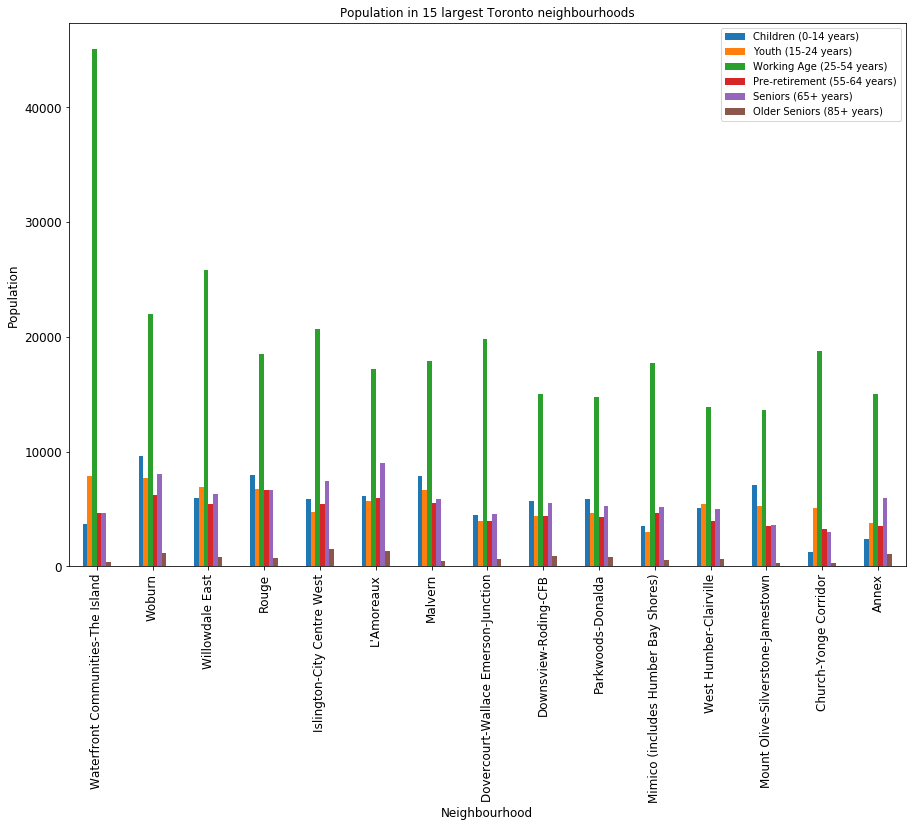

In [27]:
#plot population in the 15 largest neighbourhoods

ax = top_pop_rename[['Children (0-14 years)','Youth (15-24 years)', 'Working Age (25-54 years)', 'Pre-retirement (55-64 years)', 'Seniors (65+ years)','Older Seniors (85+ years)']].plot(kind='bar', title ="Population in 15 largest Toronto neighbourhoods", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Neighbourhood", fontsize=12)
ax.set_ylabel("Population", fontsize=12)
plt.show()

## Vulnerable population stats begins

### Isolate rows to only the ones having children and seniors

In [28]:
vuln_age_df = age_stats_df[(age_stats_df.Characteristic == 'Children (0-14 years)') | (age_stats_df.Characteristic == 'Seniors (65+ years)') | (age_stats_df.Characteristic == 'Older Seniors (85+ years)')]


### Getting row for each neighbourhood featuring total vuln population

In [29]:
vuln_age_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135,3840,3075,1760,2360,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,14,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945,6045,4105,2015,5910,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,15,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000,925,555,320,1040,...,655,885,1130,170,125,880,165,470,400,775


In [30]:
#getting neighbourhood columns from dataframe

age_num_vuln = vuln_age_df.loc[:, 'Agincourt North':'Yorkdale-Glen Park']
age_num_vuln.head()

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,3840,3075,1760,2360,3605,2325,1695,2415,1515,4555,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,6045,4105,2015,5910,6975,2940,2420,3615,3685,3980,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,925,555,320,1040,1640,710,330,610,740,660,...,655,885,1130,170,125,880,165,470,400,775


#### Adding new sum row for each neighbourhood

In [31]:
age_num_vuln.loc['Sum'] = age_num_vuln.sum()

In [32]:
age_num_vuln

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,3840,3075,1760,2360,3605,2325,1695,2415,1515,4555,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,6045,4105,2015,5910,6975,2940,2420,3615,3685,3980,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,925,555,320,1040,1640,710,330,610,740,660,...,655,885,1130,170,125,880,165,470,400,775
Sum,10810,7735,4095,9310,12220,5975,4445,6640,5940,9195,...,5810,9345,18765,3875,2385,5890,3565,4585,7975,6030


In [33]:
# fix mimico column

age_num_vuln = age_num_vuln.rename(columns={'Mimico (includes Humber Bay Shores)': 'Mimico - includes Humber Bay Shores'})
age_num_vuln

,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
9,3840,3075,1760,2360,3605,2325,1695,2415,1515,4555,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,6045,4105,2015,5910,6975,2940,2420,3615,3685,3980,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,925,555,320,1040,1640,710,330,610,740,660,...,655,885,1130,170,125,880,165,470,400,775
Sum,10810,7735,4095,9310,12220,5975,4445,6640,5940,9195,...,5810,9345,18765,3875,2385,5890,3565,4585,7975,6030


In [34]:
age_num_vuln.columns.values.tolist()

['Agincourt North',
 'Agincourt South-Malvern West',
 'Alderwood',
 'Annex',
 'Banbury-Don Mills',
 'Bathurst Manor',
 'Bay Street Corridor',
 'Bayview Village',
 'Bayview Woods-Steeles',
 'Bedford Park-Nortown',
 'Beechborough-Greenbrook',
 'Bendale',
 'Birchcliffe-Cliffside',
 'Black Creek',
 'Blake-Jones',
 'Briar Hill-Belgravia',
 'Bridle Path-Sunnybrook-York Mills',
 'Broadview North',
 'Brookhaven-Amesbury',
 'Cabbagetown-South St. James Town',
 'Caledonia-Fairbank',
 'Casa Loma',
 'Centennial Scarborough',
 'Church-Yonge Corridor',
 'Clairlea-Birchmount',
 'Clanton Park',
 'Cliffcrest',
 'Corso Italia-Davenport',
 'Danforth',
 'Danforth East York',
 'Don Valley Village',
 'Dorset Park',
 'Dovercourt-Wallace Emerson-Junction',
 'Downsview-Roding-CFB',
 'Dufferin Grove',
 'East End-Danforth',
 'Edenbridge-Humber Valley',
 'Eglinton East',
 'Elms-Old Rexdale',
 'Englemount-Lawrence',
 'Eringate-Centennial-West Deane',
 'Etobicoke West Mall',
 'Flemingdon Park',
 'Forest Hill North'

In [35]:
#get stats

age_max_df = age_num_vuln.loc[:, 'Agincourt North':'Yorkdale-Glen Park'].max(axis=1)
age_min_df = age_num_vuln.loc[:, 'Agincourt North': 'Yorkdale-Glen Park'].min(axis=1)
age_avg_df = age_num_vuln.loc[:, 'Agincourt North': 'Yorkdale-Glen Park'].mean(axis=1)

print('Max: ')
print(age_max_df)
print('Min: ')
print(age_min_df)
print('Avg: ')
print(age_avg_df)

Max: 
9       9625
13      8990
14      1640
Sum    18765
dtype: int64
Min: 
9       565
13      730
14       50
Sum    2190
dtype: int64
Avg: 
9      2843.964286
13     3048.285714
14      471.035714
Sum    6363.285714
dtype: float64


### Using the sum, get top 15 neighbourhoods based on larger size

In [36]:
age_sort_vuln = age_num_vuln.loc[:, age_num_vuln.max().sort_values(ascending=False).index]

age_sort_vuln

,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,...,Caledonia-Fairbank,Dufferin Grove,Long Branch,Lambton Baby Point,Playter Estates-Danforth,Blake-Jones,Regent Park,Woodbine-Lumsden,Beechborough-Greenbrook,University
9,9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,...,1490,1285,1335,1695,1150,1405,1635,1165,1120,565
13,8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,...,1325,1515,1405,1025,1220,895,730,1095,965,1320
14,1130,1345,685,1480,445,830,1640,870,775,700,...,165,175,140,140,195,115,50,125,145,305
Sum,18765,16455,15270,14705,14245,13020,12220,12130,11865,11495,...,2980,2975,2880,2860,2565,2415,2415,2385,2230,2190


In [37]:
#getting top 15 neighbourhoods 

top_num_vuln = age_sort_vuln.iloc[:, : 15]
top_num_vuln

,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,Tam O'Shanter-Sullivan,Mount Olive-Silverstone-Jamestown,Agincourt North,Bendale,West Humber-Clairville
9,9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,3885,7090,3840,4550,5060
13,8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,6160,3560,6045,5250,4980
14,1130,1345,685,1480,445,830,1640,870,775,700,1220,300,925,900,615
Sum,18765,16455,15270,14705,14245,13020,12220,12130,11865,11495,11265,10950,10810,10700,10655


In [38]:
top_num_vuln.shape

(4, 15)

# Testing out transpose and naming rows

In [39]:
#switch rows and columns in top_num_vuln

top_num_vuln = top_num_vuln.T

In [40]:
top_num_vuln

,9,13,14,Sum
Woburn,9625,8010,1130,18765
L'Amoreaux,6120,8990,1345,16455
Rouge,7960,6625,685,15270
Islington-City Centre West,5820,7405,1480,14705
Malvern,7910,5890,445,14245
Willowdale East,5920,6270,830,13020
Banbury-Don Mills,3605,6975,1640,12220
Downsview-Roding-CFB,5725,5535,870,12130
Parkwoods-Donalda,5840,5250,775,11865
Glenfield-Jane Heights,5790,5005,700,11495


In [41]:
#rename columns for vuln populations

top_vuln_rename = top_num_vuln.rename({9: 'Children (0-14 years)', 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='columns')

top_vuln_rename

,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
Woburn,9625,8010,1130,18765
L'Amoreaux,6120,8990,1345,16455
Rouge,7960,6625,685,15270
Islington-City Centre West,5820,7405,1480,14705
Malvern,7910,5890,445,14245
Willowdale East,5920,6270,830,13020
Banbury-Don Mills,3605,6975,1640,12220
Downsview-Roding-CFB,5725,5535,870,12130
Parkwoods-Donalda,5840,5250,775,11865
Glenfield-Jane Heights,5790,5005,700,11495


### Plot vulnerable neighbourhood populations

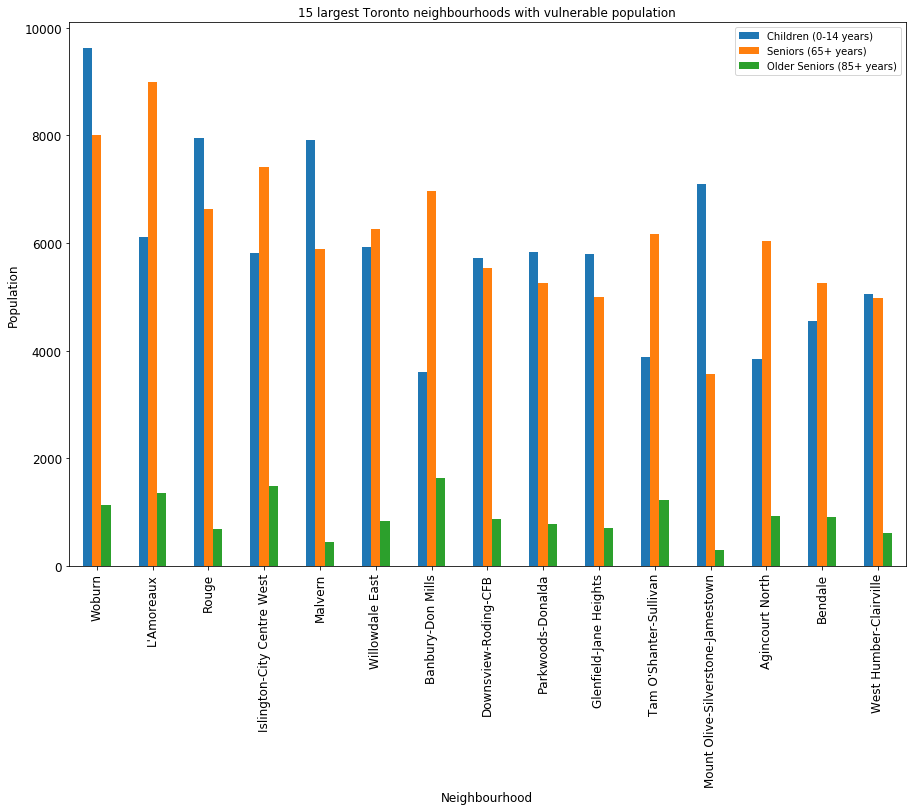

In [42]:
ax1 = top_vuln_rename[['Children (0-14 years)','Seniors (65+ years)','Older Seniors (85+ years)']].plot(kind='bar', title ="15 largest Toronto neighbourhoods with vulnerable population", figsize=(15, 10), legend=True, fontsize=12)
ax1.set_xlabel("Neighbourhood", fontsize=12)
ax1.set_ylabel("Population", fontsize=12)
plt.show()

## Test Area 2 - Attempt to combine dataframes

In [43]:
# Getting category data from vuln_age_df

chara_vuln = vuln_age_df.loc[:, 'Category':'City of Toronto']
chara_vuln

,Category,Topic,Data Source,Characteristic,City of Toronto
9,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135
13,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945
14,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000


In [44]:
#combining 2 dfs together

together_vuln = pd.concat([chara_vuln, age_sort_vuln], axis=1, sort=False)
together_vuln

,Category,Topic,Data Source,Characteristic,City of Toronto,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,...,Caledonia-Fairbank,Dufferin Grove,Long Branch,Lambton Baby Point,Playter Estates-Danforth,Blake-Jones,Regent Park,Woodbine-Lumsden,Beechborough-Greenbrook,University
9,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135.0,9625,6120,7960,5820,7910,...,1490,1285,1335,1695,1150,1405,1635,1165,1120,565
13,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945.0,8010,8990,6625,7405,5890,...,1325,1515,1405,1025,1220,895,730,1095,965,1320
14,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000.0,1130,1345,685,1480,445,...,165,175,140,140,195,115,50,125,145,305
Sum,NaN,NaN,NaN,NaN,NaN,18765,16455,15270,14705,14245,...,2980,2975,2880,2860,2565,2415,2415,2385,2230,2190


In [45]:
#top_num_vuln = together_vuln.iloc[:, 6 : 21]
#top_num_vuln

In [46]:
# Get names of rows

together_vuln.axes[0].to_list()

[9, 13, 14, 'Sum']

### TO REMOVE: Isolate rows to only the ones having children and seniors

In [47]:
#vuln_age_df = age_stats_df[(age_stats_df.Characteristic == 'Children (0-14 years)') | (age_stats_df.Characteristic == 'Seniors (65+ years)') | (age_stats_df.Characteristic == 'Older Seniors (85+ years)')]


In [48]:
#vuln_age_df.head()

### Neighbourhood number and Vulnerable age population dataframes combined

In [49]:
#original df

together_df = pd.concat([neighbourhood_num_df, vuln_age_df])
together_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135,3840,3075,1760,2360,...,1785,3555,9625,2325,1165,1860,1800,1210,4045,1960
13,14,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945,6045,4105,2015,5910,...,3370,4905,8010,1380,1095,3150,1600,2905,3530,3295
14,15,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000,925,555,320,1040,...,655,885,1130,170,125,880,165,470,400,775


### Combined dataframe with top 15 populated neighbourhoods

In [50]:
together_df2 = pd.concat([neighbourhood_num_df, together_vuln], axis=0, sort=False)
together_df2

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park,Mimico - includes Humber Bay Shores
0,1.0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,7,137,64,60,94,100,97,27,31,NaN
9,NaN,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135.0,3840,3075,1760,2360,...,3555,9625,2325,1165,1860,1800,1210,4045,1960,3505.0
13,NaN,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945.0,6045,4105,2015,5910,...,4905,8010,1380,1095,3150,1600,2905,3530,3295,5160.0
14,NaN,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000.0,925,555,320,1040,...,885,1130,170,125,880,165,470,400,775,565.0
Sum,NaN,NaN,NaN,NaN,NaN,NaN,10810,7735,4095,9310,...,9345,18765,3875,2385,5890,3565,4585,7975,6030,9230.0


In [51]:
together_sort_vuln = together_df2.sort_values(by='Sum', axis=1, ascending=False)
together_sort_vuln

,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,...,Woodbine-Lumsden,Beechborough-Greenbrook,University,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Mimico (includes Humber Bay Shores)
0,137,117,131,14,132,51,42,26,45,25,...,60,112,79,1.0,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,17
9,9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,...,1165,1120,565,NaN,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),398135.0,NaN
13,8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,...,1095,965,1320,NaN,Population,Age characteristics,Census Profile 98-316-X2016001,Seniors (65+ years),426945.0,NaN
14,1130,1345,685,1480,445,830,1640,870,775,700,...,125,145,305,NaN,Population,Age characteristics,Census Profile 98-316-X2016001,Older Seniors (85+ years),66000.0,NaN
Sum,18765,16455,15270,14705,14245,13020,12220,12130,11865,11495,...,2385,2230,2190,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Population per neighbourhood 

In [52]:
ppl_neighbourhood_df = demographics_df[(demographics_df.Characteristic == 'Population density per square kilometre') | (demographics_df.Characteristic == 'Land area in square kilometres')]

ppl_neighbourhood_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
7,8,Population,Population and dwellings,Census Profile 98-316-X2016001,Population density per square kilometre,"4,334","3,929","3,034","2,435","10,863",...,"5,820","4,007","4,345","7,838","6,722","8,541","7,162","10,708","2,086","2,451"
8,9,Population,Population and dwellings,Census Profile 98-316-X2016001,Land area in square kilometres,630.2,7.41,7.83,4.95,2.81,...,2.91,5.53,12.31,1.6,1.17,1.68,1.65,1.17,13.23,6.04


In [53]:
#turn to numeric values

ppl_neighbourhood_df = ppl_neighbourhood_df.replace(',','', regex=True)

ppl_neighbourhood_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'] = ppl_neighbourhood_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'].apply(pd.to_numeric) 

ppl_neighbourhood_df.head()

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
7,8,Population,Population and dwellings,Census Profile 98-316-X2016001,Population density per square kilometre,4334.0,3929.00,3034.00,2435.00,10863.00,...,5820.00,4007.00,4345.00,7838.0,6722.00,8541.00,7162.00,10708.00,2086.00,2451.00
8,9,Population,Population and dwellings,Census Profile 98-316-X2016001,Land area in square kilometres,630.2,7.41,7.83,4.95,2.81,...,2.91,5.53,12.31,1.6,1.17,1.68,1.65,1.17,13.23,6.04


In [54]:
#print(ppl_neighbourhood_df.dtypes)

### Remove numbers in brackets in neighbourhood_df... column AREA_NAME

In [55]:
neighbourhood_df.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [56]:
#new_neighbourhood_df = neighbourhood_df['AREA_NAME'].str.replace(r"\(.*\)","")
#new_neighbourhood_df.head()

new_neighbourhood_df = neighbourhood_df
new_neighbourhood_df.head()

#age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'] = age_stats_df.loc[:, 'City of Toronto':'Yorkdale-Glen Park'].apply(pd.to_numeric) 


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood (94),Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair (97),Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights (27),York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [57]:
#find mimico as has in area_name column so can switch word in brackets so the row is not affected after regex is applied and dataframes combined
new_neighbourhood_df.loc[new_neighbourhood_df.AREA_NAME == 'Mimico (includes Humber Bay Shores) (17)', 'AREA_NAME'] = 'Mimico - includes Humber Bay Shores (17)'

In [58]:
#check if value was properly changed
#new_neighbourhood_df.get_value(16, 'AREA_NAME')

mimico_check = new_neighbourhood_df['AREA_NAME'].values[16]
print(mimico_check)


Mimico - includes Humber Bay Shores (17)


In [59]:
new_neighbourhood_df.loc[:, 'AREA_NAME'] = new_neighbourhood_df.loc[:, 'AREA_NAME'].str.replace(r"\(.*\)","")
new_neighbourhood_df.head()

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,4341,25886861,25926662,49885,94,94,Wychwood,Wychwood (94),NaN,NaN,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
1,4342,25886820,25926663,49885,100,100,Yonge-Eglinton,Yonge-Eglinton (100),NaN,NaN,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{u'type': u'Polygon', u'coordinates': (((-79.4..."
2,4343,25886834,25926664,49885,97,97,Yonge-St.Clair,Yonge-St.Clair (97),NaN,NaN,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{u'type': u'Polygon', u'coordinates': (((-79.3..."
3,4344,25886593,25926665,49885,27,27,York University Heights,York University Heights (27),NaN,NaN,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{u'type': u'Polygon', u'coordinates': (((-79.5..."
4,4345,25886688,25926666,49885,31,31,Yorkdale-Glen Park,Yorkdale-Glen Park (31),NaN,NaN,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{u'type': u'Polygon', u'coordinates': (((-79.4..."


In [60]:
mimico_check = new_neighbourhood_df['AREA_NAME'].values[16]
print(mimico_check)

Mimico - includes Humber Bay Shores 


In [61]:
new_neighbourhood_df = new_neighbourhood_df[['AREA_NAME', 'LONGITUDE', 'LATITUDE']]
new_neighbourhood_df.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Wychwood,-79.425515,43.676919
1,Yonge-Eglinton,-79.403590,43.704689
2,Yonge-St.Clair,-79.397871,43.687859
3,York University Heights,-79.488883,43.765736
4,Yorkdale-Glen Park,-79.457108,43.714672


In [62]:
new_neighbourhood_sort = new_neighbourhood_df.sort_values('AREA_NAME')
new_neighbourhood_sort.head()


,AREA_NAME,LONGITUDE,LATITUDE
74,Agincourt North,-79.266712,43.805441
75,Agincourt South-Malvern West,-79.265612,43.788658
76,Alderwood,-79.541611,43.604937
77,Annex,-79.404001,43.671585
78,Banbury-Don Mills,-79.349718,43.737657


In [63]:
new_neighbourhood_reset = new_neighbourhood_sort.reset_index(drop=True)
new_neighbourhood_reset.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Agincourt North,-79.266712,43.805441
1,Agincourt South-Malvern West,-79.265612,43.788658
2,Alderwood,-79.541611,43.604937
3,Annex,-79.404001,43.671585
4,Banbury-Don Mills,-79.349718,43.737657


# Try 2 in combining dfs

In [64]:
#switching rows and columns
age_num_rename = age_num_all.rename({9: 'Children (0-14 years)', 10:'Youth (15-24 years)', 11: 'Working Age (25-54 years)' , 12: 'Pre-retirement (55-64 years)' , 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='rows')
age_num_rename = age_num_rename.T
age_num_rename.head()

,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
Agincourt North,3840,3705,11305,4230,6045,925,30050
Agincourt South-Malvern West,3075,3360,9965,3265,4105,555,24325
Alderwood,1760,1235,5220,1825,2015,320,12375
Annex,2360,3750,15040,3480,5910,1040,31580
Banbury-Don Mills,3605,2730,10810,3555,6975,1640,29315


In [65]:
#adding column name to neighbourhood rows

age_num_rename.index.name = 'AREA_NAME'
age_num_rename.reset_index(inplace=True)
age_num_rename.head()

,AREA_NAME,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Agincourt North,3840,3705,11305,4230,6045,925,30050
1,Agincourt South-Malvern West,3075,3360,9965,3265,4105,555,24325
2,Alderwood,1760,1235,5220,1825,2015,320,12375
3,Annex,2360,3750,15040,3480,5910,1040,31580
4,Banbury-Don Mills,3605,2730,10810,3555,6975,1640,29315


In [66]:
age_num_rename.loc[age_num_rename.AREA_NAME == 'Mimico (includes Humber Bay Shores)', 'AREA_NAME'] = 'Mimico - includes Humber Bay Shores'

In [67]:
#np.where(age_num_rename['AREA_NAME'] == 'Mimico'

In [68]:
new_neighbourhood_reset.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Agincourt North,-79.266712,43.805441
1,Agincourt South-Malvern West,-79.265612,43.788658
2,Alderwood,-79.541611,43.604937
3,Annex,-79.404001,43.671585
4,Banbury-Don Mills,-79.349718,43.737657


In [69]:
#remove trailing space for values in AREA_NAME column


#working code:
#no_space_df = new_neighbourhood_df

#no_space_df['AREA_NAME'] = no_space_df['AREA_NAME'].str.strip()

#working code:
#no_space_df.loc[:, 'AREA_NAME'].str.strip()


# Testing sorted version

no_space_df = new_neighbourhood_reset

no_space_df.head()

no_space_df.loc[:, 'AREA_NAME'] = no_space_df.loc[:, 'AREA_NAME'].str.strip()

In [70]:
no_space_df.head()

,AREA_NAME,LONGITUDE,LATITUDE
0,Agincourt North,-79.266712,43.805441
1,Agincourt South-Malvern West,-79.265612,43.788658
2,Alderwood,-79.541611,43.604937
3,Annex,-79.404001,43.671585
4,Banbury-Don Mills,-79.349718,43.737657


In [71]:
#Check 
val_check4 = no_space_df['AREA_NAME'].values[0]
val_check4

'Agincourt North'

In [72]:
#Check
val_check2 = age_num_rename['AREA_NAME'].values[0]
val_check2

'Agincourt North'

In [73]:
#Check 
val_check3 = new_neighbourhood_reset['AREA_NAME'].values[0]
val_check3

'Agincourt North'

In [74]:
combined_df = pd.merge(no_space_df, age_num_rename, on='AREA_NAME')
combined_df.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Agincourt North,-79.266712,43.805441,3840,3705,11305,4230,6045,925,30050
1,Agincourt South-Malvern West,-79.265612,43.788658,3075,3360,9965,3265,4105,555,24325
2,Alderwood,-79.541611,43.604937,1760,1235,5220,1825,2015,320,12375
3,Annex,-79.404001,43.671585,2360,3750,15040,3480,5910,1040,31580
4,Banbury-Don Mills,-79.349718,43.737657,3605,2730,10810,3555,6975,1640,29315


In [75]:
#sort by sum

combined_df_sort = combined_df.sort_values('Sum', ascending=False)
combined_df_sort.reset_index(drop=True)
combined_df_sort.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
120,Waterfront Communities-The Island,-79.377202,43.633880,3650,7840,45105,4680,4635,365,66275
129,Woburn,-79.228586,43.766740,9625,7660,21945,6245,8010,1130,54615
126,Willowdale East,-79.401484,43.770602,5920,6940,25850,5460,6270,830,51270
103,Rouge,-79.186343,43.821201,7960,6700,18510,6690,6625,685,47170
57,Islington-City Centre West,-79.543317,43.633463,5820,4695,20640,5400,7405,1480,45440


In [76]:
combined_df_sort = combined_df_sort.reset_index(drop=True)
combined_df_sort.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Waterfront Communities-The Island,-79.377202,43.633880,3650,7840,45105,4680,4635,365,66275
1,Woburn,-79.228586,43.766740,9625,7660,21945,6245,8010,1130,54615
2,Willowdale East,-79.401484,43.770602,5920,6940,25850,5460,6270,830,51270
3,Rouge,-79.186343,43.821201,7960,6700,18510,6690,6625,685,47170
4,Islington-City Centre West,-79.543317,43.633463,5820,4695,20640,5400,7405,1480,45440


In [77]:
#check top 20
combined_df_sort.head(20)

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Waterfront Communities-The Island,-79.377202,43.633880,3650,7840,45105,4680,4635,365,66275
1,Woburn,-79.228586,43.766740,9625,7660,21945,6245,8010,1130,54615
2,Willowdale East,-79.401484,43.770602,5920,6940,25850,5460,6270,830,51270
3,Rouge,-79.186343,43.821201,7960,6700,18510,6690,6625,685,47170
4,Islington-City Centre West,-79.543317,43.633463,5820,4695,20640,5400,7405,1480,45440
5,L'Amoreaux,-79.314084,43.795716,6120,5730,17210,5930,8990,1345,45325
6,Malvern,-79.222517,43.803658,7910,6620,17865,5535,5890,445,44265
7,Dovercourt-Wallace Emerson-Junction,-79.438541,43.665677,4480,3925,19790,3935,4515,595,37240
8,Downsview-Roding-CFB,-79.490497,43.733292,5725,4340,15045,4380,5535,870,35895
9,Parkwoods-Donalda,-79.330180,43.755033,5840,4680,14780,4265,5250,775,35590


In [78]:
top_15_pop = combined_df_sort.iloc[:15, :]
top_15_pop

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Youth (15-24 years),Working Age (25-54 years),Pre-retirement (55-64 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Waterfront Communities-The Island,-79.377202,43.633880,3650,7840,45105,4680,4635,365,66275
1,Woburn,-79.228586,43.766740,9625,7660,21945,6245,8010,1130,54615
2,Willowdale East,-79.401484,43.770602,5920,6940,25850,5460,6270,830,51270
3,Rouge,-79.186343,43.821201,7960,6700,18510,6690,6625,685,47170
4,Islington-City Centre West,-79.543317,43.633463,5820,4695,20640,5400,7405,1480,45440
5,L'Amoreaux,-79.314084,43.795716,6120,5730,17210,5930,8990,1345,45325
6,Malvern,-79.222517,43.803658,7910,6620,17865,5535,5890,445,44265
7,Dovercourt-Wallace Emerson-Junction,-79.438541,43.665677,4480,3925,19790,3935,4515,595,37240
8,Downsview-Roding-CFB,-79.490497,43.733292,5725,4340,15045,4380,5535,870,35895
9,Parkwoods-Donalda,-79.330180,43.755033,5840,4680,14780,4265,5250,775,35590


# For Vulnerable populations

In [103]:
#switch rows and columns

age_sort_vuln.head()


,Woburn,L'Amoreaux,Rouge,Islington-City Centre West,Malvern,Willowdale East,Banbury-Don Mills,Downsview-Roding-CFB,Parkwoods-Donalda,Glenfield-Jane Heights,...,Caledonia-Fairbank,Dufferin Grove,Long Branch,Lambton Baby Point,Playter Estates-Danforth,Blake-Jones,Regent Park,Woodbine-Lumsden,Beechborough-Greenbrook,University
9,9625,6120,7960,5820,7910,5920,3605,5725,5840,5790,...,1490,1285,1335,1695,1150,1405,1635,1165,1120,565
13,8010,8990,6625,7405,5890,6270,6975,5535,5250,5005,...,1325,1515,1405,1025,1220,895,730,1095,965,1320
14,1130,1345,685,1480,445,830,1640,870,775,700,...,165,175,140,140,195,115,50,125,145,305
Sum,18765,16455,15270,14705,14245,13020,12220,12130,11865,11495,...,2980,2975,2880,2860,2565,2415,2415,2385,2230,2190


In [104]:
vuln_num_rename = age_sort_vuln.rename({9: 'Children (0-14 years)', 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='rows')
vuln_num_rename = vuln_num_rename.T
vuln_num_rename.head()

,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
Woburn,9625,8010,1130,18765
L'Amoreaux,6120,8990,1345,16455
Rouge,7960,6625,685,15270
Islington-City Centre West,5820,7405,1480,14705
Malvern,7910,5890,445,14245


In [105]:
vuln_num_rename.shape

(140, 4)

In [106]:
vuln_num_rename.index.name = 'AREA_NAME'
vuln_num_rename.reset_index(inplace=True)
vuln_num_rename.head()

,AREA_NAME,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Woburn,9625,8010,1130,18765
1,L'Amoreaux,6120,8990,1345,16455
2,Rouge,7960,6625,685,15270
3,Islington-City Centre West,5820,7405,1480,14705
4,Malvern,7910,5890,445,14245


In [107]:
combined_vuln_df = pd.merge(no_space_df, vuln_num_rename, on='AREA_NAME')
combined_vuln_df.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Agincourt North,-79.266712,43.805441,3840,6045,925,10810
1,Agincourt South-Malvern West,-79.265612,43.788658,3075,4105,555,7735
2,Alderwood,-79.541611,43.604937,1760,2015,320,4095
3,Annex,-79.404001,43.671585,2360,5910,1040,9310
4,Banbury-Don Mills,-79.349718,43.737657,3605,6975,1640,12220


In [108]:
#sort vuln by sum

combined_vuln_sort = combined_vuln_df.sort_values('Sum', ascending=False)
combined_vuln_sort.reset_index(drop=True)
combined_vuln_sort.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
129,Woburn,-79.228586,43.766740,9625,8010,1130,18765
64,L'Amoreaux,-79.314084,43.795716,6120,8990,1345,16455
103,Rouge,-79.186343,43.821201,7960,6625,685,15270
57,Islington-City Centre West,-79.543317,43.633463,5820,7405,1480,14705
72,Malvern,-79.222517,43.803658,7910,5890,445,14245


In [109]:
combined_vuln_sort = combined_vuln_sort.reset_index(drop=True)
combined_vuln_sort.head()

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Woburn,-79.228586,43.766740,9625,8010,1130,18765
1,L'Amoreaux,-79.314084,43.795716,6120,8990,1345,16455
2,Rouge,-79.186343,43.821201,7960,6625,685,15270
3,Islington-City Centre West,-79.543317,43.633463,5820,7405,1480,14705
4,Malvern,-79.222517,43.803658,7910,5890,445,14245


In [110]:
#top 15 vuln

top_15_vuln = combined_vuln_sort.iloc[:15, :]
top_15_vuln

,AREA_NAME,LONGITUDE,LATITUDE,Children (0-14 years),Seniors (65+ years),Older Seniors (85+ years),Sum
0,Woburn,-79.228586,43.766740,9625,8010,1130,18765
1,L'Amoreaux,-79.314084,43.795716,6120,8990,1345,16455
2,Rouge,-79.186343,43.821201,7960,6625,685,15270
3,Islington-City Centre West,-79.543317,43.633463,5820,7405,1480,14705
4,Malvern,-79.222517,43.803658,7910,5890,445,14245
5,Willowdale East,-79.401484,43.770602,5920,6270,830,13020
6,Banbury-Don Mills,-79.349718,43.737657,3605,6975,1640,12220
7,Downsview-Roding-CFB,-79.490497,43.733292,5725,5535,870,12130
8,Parkwoods-Donalda,-79.330180,43.755033,5840,5250,775,11865
9,Glenfield-Jane Heights,-79.513465,43.745636,5790,5005,700,11495


### Mapping data

In [80]:
# Vuln Toronto Map

#vuln_toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)
#vuln_toronto_map

In [81]:
#Add markers
#for lat, lng, label in zip(new_combined_df['LATITUDE'], new_combined_df['LONGITUDE'], new_combined_df['AREA_NAME']):
#    label = folium.Popup(label, parse_html=True)
#    folium.CircleMarker(
#        [lat, lng],
#        radius=5,
#        popup=label,
#        color='blue',
#        fill=True,
#        fill_color='#3186cc',
#        fill_opacity=0.7,
#        parse_html=False
#    ).add_to(vuln_toronto_map)

#vuln_toronto_map

# Below code to be fixed and adjusted

In [82]:
#new_neighbourhood_reset.set_index('AREA_NAME', inplace=True)

#new_neighbourhood_reset.head()

### Adding column named AREA_NAME to top_vuln_rename dataframe with values equaling the row names

In [83]:
#top_vuln_rename.head()

In [84]:
#top_vuln_rename.index.name = 'AREA_NAME'
#top_vuln_rename.reset_index(inplace=True)

#top_vuln_rename.head()

In [85]:
#new_neighbourhood_reset.head()

In [86]:
# set index of both dfs to AREA_NAME
#top_vuln_rename.index.name = 'AREA_NAME'
#new_neighbourhood_sort.index.name = 'AREA_NAME'

#new_neighbourhood_sort.head()
#top_vuln_rename

### Combining new_neighbourhood_sort and top_vuln_rename dataframe

In [87]:
#combined_df = pd.merge(top_vuln_rename, new_neighbourhood_sort, on='AREA_NAME')

#combined_df = pd.concat([top_vuln_rename, new_neighbourhood_sort], axis=1)

#combined_df = top_vuln_rename.join(new_neighbourhood_sort)
#combined_df

In [88]:
# Keep only first 15 rows

#new_combined_df = combined_df.iloc[:15, :]
#new_combined_df

In [89]:
# Vuln Toronto Map

#vuln_toronto_map = folium.Map(location=[latitude, longitude], zoom_start=12)
#vuln_toronto_map

In [90]:
#Add markers
#for lat, lng, label in zip(new_combined_df['LATITUDE'], new_combined_df['LONGITUDE'], new_combined_df['AREA_NAME']):
#    label = folium.Popup(label, parse_html=True)
#    folium.CircleMarker(
#        [lat, lng],
#        radius=5,
#        popup=label,
#        color='blue',
#        fill=True,
#        fill_color='#3186cc',
#        fill_opacity=0.7,
#        parse_html=False
#    ).add_to(vuln_toronto_map)

#vuln_toronto_map

### TEST SECTION

In [91]:
#age_num_all

In [92]:
#age_num_rename = age_num_all.rename({9: 'Children (0-14 years)', 10:'Youth (15-24 years)', 11: 'Working Age (25-54 years)' , 12: 'Pre-retirement (55-64 years)' , 13: 'Seniors (65+ years)', 14: 'Older Seniors (85+ years)'}, axis='rows')
#age_num_rename

In [93]:
#age_num_rename = age_num_rename.T
#age_num_rename

In [94]:
#age_num_rename.index.name = 'AREA_NAME'
#age_num_rename.reset_index(inplace=True)

#age_num_rename.head()

In [95]:
#age_num_rename.set_index('AREA_NAME', inplace=True)
#age_num_rename.head()


In [96]:
#combined_df = age_num_rename.join(new_neighbourhood_reset)
#combined_df

In [97]:
# Below different code

In [98]:
#new_neighbourhood_reset = new_neighbourhood_sort.reset_index(drop=True)
#new_neighbourhood_reset.head()

In [99]:
#combined_df = pd.merge(age_num_rename, new_neighbourhood_reset, on='AREA_NAME')

#combined_df = pd.concat([age_num_rename, new_neighbourhood_reset], axis=1)

#combined_df = pd.merge(age_num_rename, new_neighbourhood_reset, how='inner')
#combined_df

In [100]:
# remove duplicate column
#cleaned_df = combined_df.loc[:,~combined_df.columns.duplicated()]
#cleaned_df.head()

### END TEST SECTION

### Visualization

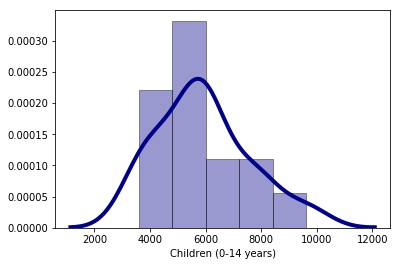

In [101]:
#Test
import seaborn as sns 

#test1=sns.kdeplot(top_pop_rename.loc[top_pop_rename['Children (0-14 years)'], 'Sum'], color='b', shade=True, Label='Children (0-14 years)') 
#plt.xlabel('Demographic Group') 
#plt.ylabel('Population') 

#test1 = top_pop_rename.groupby('Children (0-14 years)').sum.plot(kind='kde')
#test1

sns.distplot(top_vuln_rename['Children (0-14 years)'], hist=True, kde=True, 
             bins=5, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})